In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

In [119]:
# Display header and a few rows
train_path = '/content/Train.csv'
train_df = pd.read_csv( train_path,sep = ',')
display(train_df)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,7411,7.0,2013-03-20,Germany Republi,1203,CES,37.228664,-3.256505,Kwa Abdalla,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,18014,0.0,2011-02-21,Cdtf,1409,CDTF,34.615481,-9.972601,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2,26103,0.0,2013-01-04,Government Of Tanzania,1572,DWE,36.658778,-3.321529,Kwa Loishiye,0,...,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
3,31140,0.0,2011-04-03,District Council,0,District Council,33.628025,-8.860795,Mwanzechele,0,...,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,functional
4,12286,300.0,2013-03-08,District Council,1283,District Council,37.655509,-3.669777,Kwa Kidaya,0,...,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44545,43878,0.0,2013-01-23,World Vision,0,TAWASA,32.383715,-3.457624,Imalabuluhi,0,...,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
44546,50718,0.0,2011-07-25,Ded,0,DED,31.615509,-2.738682,Ilyamchele Center,0,...,soft,good,enough,enough,hand dtw,borehole,groundwater,hand pump,hand pump,non functional
44547,67177,0.0,2013-02-23,Government Of Tanzania,969,Government,35.134412,-10.676062,Kwa Mzee Maondo,0,...,soft,good,seasonal,seasonal,spring,spring,groundwater,communal standpipe,communal standpipe,functional
44548,2744,200.0,2013-03-26,Adra,1269,ADRA/Government,37.886287,-4.390882,Miembeni,0,...,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional


In [120]:
test_path = '/content/test.csv'
test_df = pd.read_csv(test_path ,sep = ',',index_col= 0)
display(test_df)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,21215,0.0,2011-02-25,Kuamu,1676,Kuamu,35.247289,-8.113243,none,0,...,never pay,soft,good,dry,dry,spring,spring,groundwater,communal standpipe,communal standpipe
1,25893,0.0,2011-04-17,Kirde,0,DWE,36.163435,-5.218454,Zahanati,0,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
2,15713,0.0,2011-03-27,Water,0,Gover,36.363337,-7.297600,Uganda,0,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
3,17247,0.0,2011-07-14,Ka,0,KA,31.496315,-2.167140,Kakindo,0,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
4,1248,0.0,2011-07-31,World Vision,0,KYASHA ENTERPR,31.843905,-1.244841,Shule Ya Msingi Ibosa,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,45291,1000.0,2011-03-10,Danida,1811,DANID,34.533405,-9.781788,none,0,...,annually,soft,good,seasonal,seasonal,spring,spring,groundwater,communal standpipe,communal standpipe
14846,54736,0.0,2011-03-18,Solidame,252,SOLIDAME,36.665856,-8.141162,Kwamadenge,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,44238,0.0,2012-11-03,Government Of Tanzania,0,Central government,33.020305,-4.949560,Kwa Mzee Salum Chata,0,...,never pay,soft,good,dry,dry,spring,spring,groundwater,communal standpipe multiple,communal standpipe
14848,13229,0.0,2013-01-18,Tassaf I,1294,TASSAF,30.588892,-3.837622,Center,0,...,unknown,soft,good,enough,enough,spring,spring,groundwater,communal standpipe multiple,communal standpipe


Inspecting Test data set:

In [121]:
for col in test_df.columns.values :
  list_vals = pd.unique(test_df[col])
  print(col + ' is of type ' + str(test_df[col].dtypes) + ' ,has ' + str(len(list_vals)) + ' unique values, and ' + str(test_df[col].isnull().sum()) + ' null entries ')
  if len(list_vals) < 11: #if the number of uniqe values is less than 10 then print them
    list_str = ''
    for n_value in range(len(list_vals)):
      list_str += str(list_vals[n_value]) + ','
    print('These are:',list_str)

id is of type int64 ,has 14850 unique values, and 0 null entries 
amount_tsh is of type float64 ,has 74 unique values, and 0 null entries 
date_recorded is of type object ,has 326 unique values, and 0 null entries 
funder is of type object ,has 948 unique values, and 842 null entries 
gps_height is of type int64 ,has 2128 unique values, and 0 null entries 
installer is of type object ,has 1085 unique values, and 848 null entries 
longitude is of type float64 ,has 14390 unique values, and 0 null entries 
latitude is of type float64 ,has 14390 unique values, and 0 null entries 
wpt_name is of type object ,has 10708 unique values, and 0 null entries 
num_private is of type int64 ,has 38 unique values, and 0 null entries 
basin is of type object ,has 9 unique values, and 0 null entries 
These are: Rufiji,Wami / Ruvu,Lake Victoria,Lake Tanganyika,Internal,Ruvuma / Southern Coast,Pangani,Lake Nyasa,Lake Rukwa,
subvillage is of type object ,has 8449 unique values, and 84 null entries 
region 

Inspecting training data set

In [122]:
print(train_df.dtypes)

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [123]:
# To get an idea about the statistics of numerical features
train_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,44550.000000,44550.000000,44550.000000,44550.000000,4.455000e+04,44550.000000,44550.000000,44550.000000,44550.000000,44550.000000
mean,37192.623681,307.623224,665.490774,34.084084,-5.721980e+00,0.521549,15.338563,5.678967,179.112750,1295.782155
std,21399.827198,2402.742799,693.653179,6.555924,2.948828e+00,13.835868,17.672144,9.724205,478.995645,953.183961
min,1.000000,0.000000,-90.000000,0.000000,-1.164838e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18723.250000,0.000000,0.000000,33.105585,-8.574241e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37183.500000,0.000000,363.000000,34.905600,-5.045611e+00,0.000000,12.000000,3.000000,25.000000,1985.000000
75%,55647.500000,20.000000,1318.000000,37.176859,-3.327795e+00,0.000000,17.000000,5.000000,210.000000,2004.000000
max,74247.000000,170000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


To get an idea about the distribution of certain features:

In [124]:
train_df.construction_year.value_counts()

0       15641
2010     1991
2008     1935
2009     1928
2000     1575
2007     1199
2006     1115
2003      960
2011      934
2004      838
2012      804
2002      801
1978      780
2005      776
1995      739
1999      721
1985      705
1998      702
1990      691
1980      625
1996      619
1984      580
1994      556
1982      553
1972      541
1974      510
1997      482
1992      474
1993      433
2001      413
1988      386
1983      372
1975      325
1986      325
1970      294
1976      281
1991      238
1989      233
1987      223
1981      181
1977      149
1979      142
1973      138
2013      131
1971      108
1960       75
1967       70
1968       60
1963       58
1969       39
1964       31
1962       28
1961       17
1966       14
1965       11
Name: construction_year, dtype: int64

In [125]:
print(train_df.date_recorded.value_counts())

2011-03-15    423
2011-03-17    411
2013-02-03    397
2011-03-14    391
2011-03-16    379
             ... 
2012-01-21      1
2011-09-28      1
2011-09-16      1
2004-04-01      1
2011-08-31      1
Name: date_recorded, Length: 346, dtype: int64


In [126]:
print(train_df.public_meeting.value_counts())

True     38212
False     3847
Name: public_meeting, dtype: int64


In [127]:
print(train_df.permit.value_counts())

True     29057
False    13157
Name: permit, dtype: int64


In [128]:
#to print TYPE of feature,NUMBER of UNIQUE VALUES and NUMBER of NULL ENTRIES

for col in train_df.columns.values :
  list_vals = pd.unique(train_df[col])
  print(col + ' is of type ' + str(train_df[col].dtypes) + ' ,has ' + str(len(list_vals)) + ' unique values, and ' + str(train_df[col].isnull().sum()) + ' null entries ')
  if len(list_vals) < 11: #if the number of uniqe values is less than 10 then print them
    list_str = ''
    for n_value in range(len(list_vals)):
      list_str += str(list_vals[n_value]) + ','
    print('These are:',list_str)


id is of type int64 ,has 44550 unique values, and 0 null entries 
amount_tsh is of type float64 ,has 85 unique values, and 0 null entries 
date_recorded is of type object ,has 346 unique values, and 0 null entries 
funder is of type object ,has 1652 unique values, and 2793 null entries 
gps_height is of type int64 ,has 2396 unique values, and 0 null entries 
installer is of type object ,has 1855 unique values, and 2807 null entries 
longitude is of type float64 ,has 43155 unique values, and 0 null entries 
latitude is of type float64 ,has 43155 unique values, and 0 null entries 
wpt_name is of type object ,has 28991 unique values, and 0 null entries 
num_private is of type int64 ,has 59 unique values, and 0 null entries 
basin is of type object ,has 9 unique values, and 0 null entries 
These are: Pangani,Lake Nyasa,Rufiji,Lake Tanganyika,Lake Victoria,Wami / Ruvu,Internal,Ruvuma / Southern Coast,Lake Rukwa,
subvillage is of type object ,has 16618 unique values, and 287 null entries 
re

In [129]:
for col in train_df.columns.values :
  list_vals = pd.unique(train_df[col])
  if (len(list_vals) < 20) & (len(list_vals) > 10): #if the number of uniqe values is less than 10 then print them
    list_str = ''
    for n_value in range(len(list_vals)):
      list_str += str(list_vals[n_value]) + ','
    print('Unique values for feature',col,' are: ',len(list_vals),list_str)


Unique values for feature scheme_management  are:  13 Water Board,Private operator,VWC,Parastatal,Water authority,WUG,nan,Trust,WUA,Company,Other,SWC,None,
Unique values for feature extraction_type  are:  18 gravity,nira/tanira,mono,swn 80,submersible,other,afridev,ksb,india mark ii,other - rope pump,cemo,walimi,other - swn 81,climax,india mark iii,other - play pump,windmill,other - mkulima/shinyanga,
Unique values for feature extraction_type_group  are:  13 gravity,nira/tanira,mono,swn 80,submersible,other,afridev,india mark ii,rope pump,other motorpump,other handpump,india mark iii,wind-powered,
Unique values for feature management  are:  12 water board,private operator,vwc,wug,parastatal,trust,wua,unknown,water authority,other,company,other - school,


**Feature Distributions:**

In [130]:
pd.unique(train_df['funder'])

array(['Germany Republi', 'Cdtf', 'Government Of Tanzania', ..., 'Sema S',
       'Mwl.Mwita', 'If'], dtype=object)

In [131]:
pd.unique(train_df['funder'])

array(['Germany Republi', 'Cdtf', 'Government Of Tanzania', ..., 'Sema S',
       'Mwl.Mwita', 'If'], dtype=object)

In [132]:
pd.value_counts(train_df['extraction_type'])

gravity                      20127
nira/tanira                   6130
other                         4768
submersible                   3560
swn 80                        2771
mono                          2164
india mark ii                 1768
afridev                       1339
ksb                           1043
other - rope pump              335
other - swn 81                 177
windmill                        89
india mark iii                  77
cemo                            70
other - play pump               65
walimi                          39
climax                          26
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

There are a lot of categorical features in this dataset.

We observe that the features with null values are :\
1)funder with 2793 null entries\
2)installer with 2807 null entries\
3)subvillage with 287 null entries\
4)publicmeeting with 2491 null entries\
5)scheme_management with 2832 null entries\
6)scheme_name with 21110 null entries\
7)permit with 2336 null entries


1)Data for all the pumps have been collected by Geodata Consulting Ltd,so we can remove that column.\
**Dropping recorded_by** feature.\
2)We shall observe correlation amongst categorical features using Cramers statistics.

https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

In [133]:
#Cramers statistics
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [134]:
print("Cramer correlation between waterpoint_type and waterpoint_type_group is ",cramers_v(train_df['waterpoint_type'],train_df['waterpoint_type_group']))
print("Cramer correlation between scheme_management and management is ",cramers_v(train_df['scheme_management'],train_df['management']))
print("Cramer correlation between payment_type and payment is ",cramers_v(train_df['payment_type'],train_df['payment']))
print("Cramer correlation between waterquality and quality_group is ",cramers_v(train_df['water_quality'],train_df['quality_group']))
print("Cramer correlation between quantity and quantity_group is ",cramers_v(train_df['quantity'],train_df['quantity_group']))
print("Cramer correlation between source_class and source_type is ",cramers_v(train_df['source_class'],train_df['source_type']))
print("Cramer correlation between funder and installer is ",cramers_v(train_df['funder'],train_df['installer']))
print("Cramer correlation between extraction_type and extraction_type_group is ",cramers_v(train_df['extraction_type_group'],train_df['extraction_type']))
print("Cramer correlation between extraction_type_class and extraction_type is ",cramers_v(train_df['extraction_type_group'],train_df['extraction_type']))
print("Cramer correlation between management and management_group is ",cramers_v(train_df['management_group'],train_df['management']))
print("Cramer correlation between region and region_code is ",cramers_v(train_df['region'],train_df['region_code']))
print("Cramer correlation between status_group and basin is ",cramers_v(train_df['basin'],train_df['status_group']))


Cramer correlation between waterpoint_type and waterpoint_type_group is  0.9999887750806787
Cramer correlation between scheme_management and management is  0.7588127798655045
Cramer correlation between payment_type and payment is  1.0
Cramer correlation between waterquality and quality_group is  0.9999775500353559
Cramer correlation between quantity and quantity_group is  0.9999999999999999
Cramer correlation between source_class and source_type is  0.9999551025905579
Cramer correlation between funder and installer is  0.7497047078759796
Cramer correlation between extraction_type and extraction_type_group is  0.9999438653216356
Cramer correlation between extraction_type_class and extraction_type is  0.9999438653216356
Cramer correlation between management and management_group is  0.9999214246826309
Cramer correlation between region and region_code is  0.9979784860164598
Cramer correlation between status_group and basin is  0.12472447872030533


**amount_tsh**

In [135]:
##Number of null values for the feature "amount_tsh"
train_df['amount_tsh'] = train_df['amount_tsh'].replace(0, np.nan)
train_df['amount_tsh'].isnull().sum()

31231

With more than half of the values of this feature being zero,we shall **drop amount_tsh**.

**Dropping column "waterpoint_type_group"** instead of "waterpoint_type" as it has only 6 unique values and probably less information.\
**Dropping column "quality_group"** instead of "water_quality" based on similar reasoning.\
**Dropping feature quantity** as it is correlated with quantity_group.\
**Dropping "source_type" and "source_class"** as these features are predictable from "source".\
**Dropping "payment"** for information redundancy with "payment_type".\
**Dropping recorded_by** feature as it is same for all and thereby contains no discriminatory information.\
**Dropping scheme_name** as it does not seem relevant as we already have scheme mangament information.\
**Dropping extraction_type_group and extraction_type_class** and keeping the feature extraction_type as it can provide greater detail.\
**Dropping scheme_management** and keeping management as it has more number of relevant unique features.\

**LABEL FEATURES**

**Dropping wpt_name** as it has around 28000 unique values,it must be serving a labelling purpose.\
**Dropping id** as it is a label.

**LOCATION INFORMATION**

There are 8 features in this dataset that correspond to the location of the water pump.\
Numerical features are latitude,longitude,region_code and district_code.\
The categorical features are sub_village,region,lga and ward.\
We shall only consider the categorical information as it will include the information contained within the numerical features.\
Therefore,**dropping latitude,longitude,region_code and district_code**.

**Population and Construction Year**

In [136]:
#Number of null values for the feature "construction_year"
train_df['construction_year'] = train_df['construction_year'].replace(0, np.nan)
train_df['construction_year'].isnull().sum()


15641

In [137]:
#Number of null values for the feature "population"
train_df['population'] = train_df['population'].replace(0, np.nan)
train_df['population'].isnull().sum()

16150

Both these features have around 30% of its values as zero which is not meaningful.\
Yet another observation is that these null values are appearing together for both these features.\
We shall **drop population and construction_year** features.

Histogram for num_private feature reveals the skewed nature of the distribution.\
**Dropping num_private** for base model.

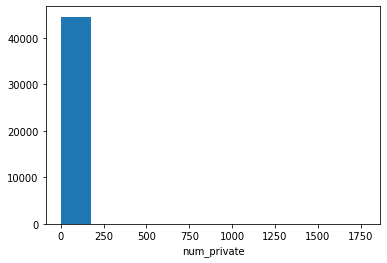

In [138]:
    plt.hist(train_df['num_private'])
    plt.xlabel('num_private')
    plt. show()

**BASE MODEL CONSIDERATIONS :**

The proposed approach is to go with **tree based model** which will be suitable for the large number of categorical variables that are present in the dataset.

date_recorded feature only varies within the range of 2011 - 2013,except for 4 instances of  the year 2004.\
**Removing date_recorded** for the base model.

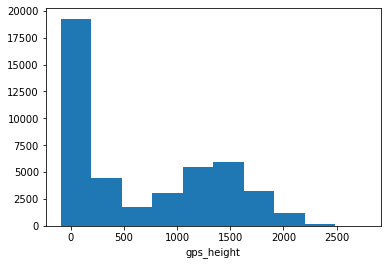

In [139]:
    plt.hist(train_df['gps_height'])
    plt.xlabel('gps_height')
    plt. show()

**Removing** **gps_height** for the base model.

In [140]:
train_df = train_df.dropna(axis=0, subset=['permit'])
train_df = train_df.dropna(axis=0, subset=['public_meeting'])

Both features **permit** and public_meeting have skewed distribution and also there is significant number of missing values in the test data.\
Thereby,**dropping permit and public_meeting**.

Removing **subvillage** for base model.

In [141]:
train_set1 = train_df.drop(['installer','subvillage','permit','public_meeting','id','gps_height','date_recorded','num_private','population','construction_year','amount_tsh','latitude','longitude','region_code','district_code','funder','wpt_name','scheme_management','management_group','extraction_type_group','extraction_type_class','recorded_by','scheme_name','payment','source_class','quality_group','source_type','quantity','waterpoint_type_group'],axis = 1)

In [142]:
train_set1

,basin,region,lga,ward,extraction_type,management,payment_type,water_quality,quantity_group,source,waterpoint_type,status_group
0,Pangani,Kilimanjaro,Hai,Machame Kaskazini,gravity,water board,per bucket,soft,enough,spring,communal standpipe,functional
1,Lake Nyasa,Iringa,Ludewa,Luana,gravity,private operator,never pay,soft,enough,spring,communal standpipe,functional
2,Pangani,Arusha,Arusha Rural,Kimnyaki,gravity,vwc,never pay,soft,insufficient,spring,communal standpipe,non functional
3,Rufiji,Mbeya,Mbeya Rural,Inyala,gravity,wug,annually,soft,insufficient,river,communal standpipe,functional
4,Pangani,Kilimanjaro,Mwanga,Shinghatini,gravity,vwc,monthly,soft,insufficient,spring,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...
44543,Rufiji,Morogoro,Kilombero,Ifakara,submersible,vwc,never pay,soft,insufficient,machine dbh,communal standpipe,non functional
44545,Lake Tanganyika,Shinyanga,Kahama,Segese,nira/tanira,wug,unknown,milky,enough,shallow well,hand pump,functional
44546,Lake Victoria,Kagera,Chato,Katende,afridev,wua,monthly,soft,enough,hand dtw,hand pump,non functional
44548,Pangani,Kilimanjaro,Same,Suji,gravity,vwc,monthly,soft,insufficient,spring,communal standpipe,functional


In [143]:
test_set1 = test_df.drop(['installer','subvillage','permit','public_meeting','id','gps_height','date_recorded','num_private','population','construction_year','amount_tsh','latitude','longitude','region_code','district_code','funder','wpt_name','scheme_management','management_group','extraction_type_group','extraction_type_class','recorded_by','scheme_name','payment','source_class','quality_group','source_type','quantity','waterpoint_type_group'],axis = 1)

**Dealing with Missing Values :**

In [144]:
#to print TYPE of feature,NUMBER of UNIQUE VALUES and NUMBER of NULL ENTRIES

for col in train_set1.columns.values :
  list_vals = pd.unique(train_df[col])
  print(col + ' is of type ' + str(train_set1[col].dtypes) + ' ,has ' + str(len(list_vals)) + ' unique values, and ' + str(train_set1[col].isnull().sum()) + ' null entries ')
  if len(list_vals) < 11: #if the number of uniqe values is less than 10 then print them
    list_str = ''
    for n_value in range(len(list_vals)):
      list_str += str(list_vals[n_value]) + ','
    print('These are:',list_str)

basin is of type object ,has 9 unique values, and 0 null entries 
These are: Pangani,Lake Nyasa,Rufiji,Lake Tanganyika,Lake Victoria,Wami / Ruvu,Internal,Ruvuma / Southern Coast,Lake Rukwa,
region is of type object ,has 21 unique values, and 0 null entries 
lga is of type object ,has 122 unique values, and 0 null entries 
ward is of type object ,has 1964 unique values, and 0 null entries 
extraction_type is of type object ,has 18 unique values, and 0 null entries 
management is of type object ,has 12 unique values, and 0 null entries 
payment_type is of type object ,has 7 unique values, and 0 null entries 
These are: per bucket,never pay,annually,monthly,unknown,on failure,other,
water_quality is of type object ,has 8 unique values, and 0 null entries 
These are: soft,salty abandoned,unknown,salty,fluoride,milky,coloured,fluoride abandoned,
quantity_group is of type object ,has 5 unique values, and 0 null entries 
These are: enough,insufficient,dry,seasonal,unknown,
source is of type o

In [145]:
test_set1

,basin,region,lga,ward,extraction_type,management,payment_type,water_quality,quantity_group,source,waterpoint_type
0,Rufiji,Iringa,Iringa Rural,Wasa,gravity,vwc,never pay,soft,dry,spring,communal standpipe
1,Wami / Ruvu,Dodoma,Kondoa,Chandama,mono,vwc,never pay,soft,enough,machine dbh,communal standpipe
2,Rufiji,Dodoma,Mpwapwa,Ipera,nira/tanira,vwc,never pay,soft,enough,shallow well,hand pump
3,Lake Victoria,Kagera,Muleba,Kyebitembe,other,vwc,never pay,soft,enough,shallow well,hand pump
4,Lake Victoria,Kagera,Bukoba Rural,Nyakato,gravity,vwc,never pay,soft,insufficient,rainwater harvesting,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...
14845,Lake Nyasa,Iringa,Ludewa,Mlangali,gravity,vwc,annually,soft,seasonal,spring,communal standpipe
14846,Rufiji,Morogoro,Kilombero,Lumemo,nira/tanira,vwc,never pay,soft,insufficient,shallow well,hand pump
14847,Lake Tanganyika,Tabora,Uyui,Magiri,other,vwc,never pay,soft,dry,spring,communal standpipe multiple
14848,Lake Tanganyika,Kigoma,Kibondo,Rugongowe,gravity,vwc,unknown,soft,enough,spring,communal standpipe multiple


In [146]:
for col in test_set1.columns.values :
  list_vals = pd.unique(test_df[col])
  print(col + ' is of type ' + str(test_set1[col].dtypes) + ' ,has ' + str(len(list_vals)) + ' unique values, and ' + str(test_set1[col].isnull().sum()) + ' null entries ')
  if len(list_vals) < 11: #if the number of uniqe values is less than 10 then print them
    list_str = ''
    for n_value in range(len(list_vals)):
      list_str += str(list_vals[n_value]) + ','
    print('These are:',list_str)

basin is of type object ,has 9 unique values, and 0 null entries 
These are: Rufiji,Wami / Ruvu,Lake Victoria,Lake Tanganyika,Internal,Ruvuma / Southern Coast,Pangani,Lake Nyasa,Lake Rukwa,
region is of type object ,has 21 unique values, and 0 null entries 
lga is of type object ,has 124 unique values, and 0 null entries 
ward is of type object ,has 1942 unique values, and 0 null entries 
extraction_type is of type object ,has 17 unique values, and 0 null entries 
management is of type object ,has 12 unique values, and 0 null entries 
payment_type is of type object ,has 7 unique values, and 0 null entries 
These are: never pay,on failure,per bucket,unknown,other,monthly,annually,
water_quality is of type object ,has 8 unique values, and 0 null entries 
These are: soft,salty,coloured,milky,unknown,salty abandoned,fluoride,fluoride abandoned,
quantity_group is of type object ,has 5 unique values, and 0 null entries 
These are: dry,enough,insufficient,seasonal,unknown,
source is of type o

**CATBOOST**

In [147]:
train_set1

,basin,region,lga,ward,extraction_type,management,payment_type,water_quality,quantity_group,source,waterpoint_type,status_group
0,Pangani,Kilimanjaro,Hai,Machame Kaskazini,gravity,water board,per bucket,soft,enough,spring,communal standpipe,functional
1,Lake Nyasa,Iringa,Ludewa,Luana,gravity,private operator,never pay,soft,enough,spring,communal standpipe,functional
2,Pangani,Arusha,Arusha Rural,Kimnyaki,gravity,vwc,never pay,soft,insufficient,spring,communal standpipe,non functional
3,Rufiji,Mbeya,Mbeya Rural,Inyala,gravity,wug,annually,soft,insufficient,river,communal standpipe,functional
4,Pangani,Kilimanjaro,Mwanga,Shinghatini,gravity,vwc,monthly,soft,insufficient,spring,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...
44543,Rufiji,Morogoro,Kilombero,Ifakara,submersible,vwc,never pay,soft,insufficient,machine dbh,communal standpipe,non functional
44545,Lake Tanganyika,Shinyanga,Kahama,Segese,nira/tanira,wug,unknown,milky,enough,shallow well,hand pump,functional
44546,Lake Victoria,Kagera,Chato,Katende,afridev,wua,monthly,soft,enough,hand dtw,hand pump,non functional
44548,Pangani,Kilimanjaro,Same,Suji,gravity,vwc,monthly,soft,insufficient,spring,communal standpipe,functional


In [148]:
pip install catboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [149]:
from catboost import CatBoostClassifier

In [150]:
X = train_set1.drop(['status_group'], axis=1)
y = train_set1.status_group

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.7, random_state=1234)

In [152]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


Hyperparamenter depth of the tree was kept at 12 so that all the features could be included in the classification.\
Evaluation metric has been set to Accuracy.\
Loss function is multiclass loss function.\
Number of iterations are kept at 50 so as to get rough idea of teh model performance.

In [153]:
#importing library and building model
model=CatBoostClassifier(iterations=50, depth=13, learning_rate=0.1,eval_metric='Accuracy', loss_function='MultiClass')
model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_validation, y_validation),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.7349837	test: 0.7233119	best: 0.7233119 (0)	total: 700ms	remaining: 34.3s
1:	learn: 0.7396702	test: 0.7299057	best: 0.7299057 (1)	total: 1.45s	remaining: 34.8s
2:	learn: 0.7390978	test: 0.7289041	best: 0.7299057 (1)	total: 2.03s	remaining: 31.8s
3:	learn: 0.7407076	test: 0.7274852	best: 0.7299057 (1)	total: 2.6s	remaining: 29.9s
4:	learn: 0.7419597	test: 0.7320758	best: 0.7320758 (4)	total: 3.31s	remaining: 29.8s
5:	learn: 0.7412442	test: 0.7334112	best: 0.7334112 (5)	total: 4.88s	remaining: 35.8s
6:	learn: 0.7437484	test: 0.7323262	best: 0.7334112 (5)	total: 6.61s	remaining: 40.6s
7:	learn: 0.7470754	test: 0.7363325	best: 0.7363325 (7)	total: 7.7s	remaining: 40.4s
8:	learn: 0.7506171	test: 0.7391704	best: 0.7391704 (8)	total: 9.37s	remaining: 42.7s
9:	learn: 0.7530855	test: 0.7409231	best: 0.7409231 (9)	total: 10.5s	remaining: 42.2s
10:	learn: 0.7562695	test: 0.7417578	best: 0.7417578 (10)	total: 11.5s	remaining: 40.9s
11:	learn: 0.7583801	test: 0.7438444	best: 0.7438444 (

**Feature Importance**

In [154]:
model.get_feature_importance(prettified = True)

,Feature Id,Importances
0,quantity_group,18.447876
1,lga,11.285418
2,payment_type,10.613311
3,source,10.104462
4,basin,9.795654
5,region,8.997436
6,ward,7.683383
7,waterpoint_type,7.666762
8,extraction_type,7.439351
9,management,7.196728


In [155]:
DF = pd.DataFrame(model.predict(test_set1), columns = ['status_group'])

In [156]:
DF.insert(loc=0, column = 'id', value=test_df['id'])

# DF['id'] = test_df['id']

# columns_titles = ["B","A"]
# df=df.reindex(columns=columns_titles)

In [157]:
DF

,id,status_group
0,21215,non functional
1,25893,non functional
2,15713,functional
3,17247,non functional
4,1248,functional
...,...,...
14845,45291,functional
14846,54736,functional
14847,44238,non functional
14848,13229,functional


In [158]:
DF.to_csv("prediction_catboost.csv", index=False)

In [159]:
features = train_set1.columns.tolist()
features.remove('status_group')
features

['basin',
 'region',
 'lga',
 'ward',
 'extraction_type',
 'management',
 'payment_type',
 'water_quality',
 'quantity_group',
 'source',
 'waterpoint_type']

In [160]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

In [161]:
type(train_set1.drop('status_group', axis=1))

pandas.core.frame.DataFrame

In [162]:
X_encoder = OrdinalEncoder()
X_encoder.fit(train_set1.drop('status_group', axis=1).append(test_set1))
train_X_encoded = X_encoder.transform(train_set1.drop('status_group', axis=1))

In [163]:
train_set1.drop('status_group', axis=1).append(test_set1)

,basin,region,lga,ward,extraction_type,management,payment_type,water_quality,quantity_group,source,waterpoint_type
0,Pangani,Kilimanjaro,Hai,Machame Kaskazini,gravity,water board,per bucket,soft,enough,spring,communal standpipe
1,Lake Nyasa,Iringa,Ludewa,Luana,gravity,private operator,never pay,soft,enough,spring,communal standpipe
2,Pangani,Arusha,Arusha Rural,Kimnyaki,gravity,vwc,never pay,soft,insufficient,spring,communal standpipe
3,Rufiji,Mbeya,Mbeya Rural,Inyala,gravity,wug,annually,soft,insufficient,river,communal standpipe
4,Pangani,Kilimanjaro,Mwanga,Shinghatini,gravity,vwc,monthly,soft,insufficient,spring,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...
14845,Lake Nyasa,Iringa,Ludewa,Mlangali,gravity,vwc,annually,soft,seasonal,spring,communal standpipe
14846,Rufiji,Morogoro,Kilombero,Lumemo,nira/tanira,vwc,never pay,soft,insufficient,shallow well,hand pump
14847,Lake Tanganyika,Tabora,Uyui,Magiri,other,vwc,never pay,soft,dry,spring,communal standpipe multiple
14848,Lake Tanganyika,Kigoma,Kibondo,Rugongowe,gravity,vwc,unknown,soft,enough,spring,communal standpipe multiple


In [164]:
train_X_encoded

array([[  5.,   6.,  16., ...,   1.,   8.,   1.],
       [  1.,   3.,  51., ...,   1.,   8.,   1.],
       [  5.,   0.,   0., ...,   2.,   8.,   1.],
       ...,
       [  4.,   4.,  12., ...,   1.,   1.,   4.],
       [  5.,   6., 101., ...,   2.,   8.,   1.],
       [  3.,  19.,  94., ...,   1.,   7.,   4.]])

In [165]:
y_encoder = LabelEncoder()
train_y_encoded = y_encoder.fit_transform(train_set1['status_group'])

In [166]:
from sklearn.naive_bayes import CategoricalNB

cnb = CategoricalNB()
cnb.fit(train_X_encoded, train_y_encoded)

CategoricalNB()

In [167]:
from sklearn.metrics import accuracy_score

#Training accuracy
y_train_pred_cnb = cnb.predict(train_X_encoded)
accuracy_score(train_y_encoded, y_train_pred_cnb)

0.6980267441278108

In [168]:
test_X_encoded = X_encoder.transform(test_set1)
y_test_pred_cnb = cnb.predict(test_X_encoded)

In [169]:
PF = pd.DataFrame(y_encoder.inverse_transform(y_test_pred_cnb), columns = ['status_group'])
PF.insert(loc=0, column = 'id', value=test_df['id'])
PF.to_csv("prediction_cnb.csv", index=False)


In [170]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(train_X_encoded, train_y_encoded)

RandomForestClassifier(max_depth=2, random_state=0)

In [171]:
#Training accuracy
y_train_pred_cnb = clf.predict(train_X_encoded)
accuracy_score(train_y_encoded, y_train_pred_cnb)

0.6952471578103872

In [172]:
y_test_pred_cnb = clf.predict(test_X_encoded)

In [173]:
RF = pd.DataFrame(y_encoder.inverse_transform(y_test_pred_cnb), columns = ['status_group'])
RF.insert(loc=0, column = 'id', value=test_df['id'])
RF.to_csv("prediction_rf.csv", index=False)
